In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver
import os

In [2]:
load_dotenv()

True

In [3]:
groq_key = os.environ["GROQ_API_KEY"]

In [4]:
# Create model
model = ChatGroq(
    api_key=groq_key,
    model="llama3-70b-8192"
)


In [5]:
class JokeState(TypedDict):

    topic: str
    joke: str
    explanation: str

In [6]:
def generate_joke(state: JokeState):

    prompt = f'generate a joke on the topic {state["topic"]}'
    response =model.invoke(prompt).content

    return {'joke': response}

In [7]:
def generate_explanation(state: JokeState):

    prompt = f'write an explanation for the joke - {state["joke"]}'
    response = model.invoke(prompt).content

    return {'explanation': response}

In [8]:
graph = StateGraph(JokeState)

graph.add_node('generate_joke', generate_joke)
graph.add_node('generate_explanation', generate_explanation)

graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', 'generate_explanation')
graph.add_edge('generate_explanation', END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)

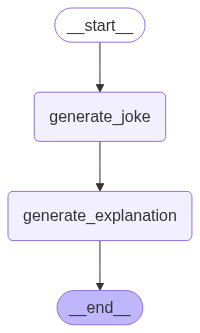

In [9]:
workflow

In [10]:
config1 = {"configurable": {"thread_id": "1"}}
workflow.invoke({'topic':'pizza'}, config=config1)

{'topic': 'pizza',
 'joke': "Here's one:\n\nWhy was the pizza in a bad mood?\n\nBecause it was feeling a little crusty!\n\nHope that made you laugh!",
 'explanation': 'Let me break down the joke for you:\n\nThe joke is a play on words, using a pun to create humor. Here\'s how it works:\n\nThe setup for the joke is "Why was the pizza in a bad mood?" which implies that the pizza is experiencing some kind of emotional distress.\n\nThe punchline "Because it was feeling a little crusty!" is where the pun comes in. "Crusty" has a double meaning here:\n\n1. In baking, the crust refers to the outer layer of a bread or pastry, including pizza. So, in this context, "crusty" could literally mean that the pizza\'s crust is in a bad state (e.g., burnt, stale, etc.).\n2. However, "crusty" is also an adjective that can be used to describe someone or something that is irritable, grumpy, or ill-tempered. For example, "He\'s been feeling crusty all day, don\'t talk to him."\n\nThe joke relies on the une

In [11]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'pizza', 'joke': "Here's one:\n\nWhy was the pizza in a bad mood?\n\nBecause it was feeling a little crusty!\n\nHope that made you laugh!", 'explanation': 'Let me break down the joke for you:\n\nThe joke is a play on words, using a pun to create humor. Here\'s how it works:\n\nThe setup for the joke is "Why was the pizza in a bad mood?" which implies that the pizza is experiencing some kind of emotional distress.\n\nThe punchline "Because it was feeling a little crusty!" is where the pun comes in. "Crusty" has a double meaning here:\n\n1. In baking, the crust refers to the outer layer of a bread or pastry, including pizza. So, in this context, "crusty" could literally mean that the pizza\'s crust is in a bad state (e.g., burnt, stale, etc.).\n2. However, "crusty" is also an adjective that can be used to describe someone or something that is irritable, grumpy, or ill-tempered. For example, "He\'s been feeling crusty all day, don\'t talk to him."\n\nThe jok

In [12]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': "Here's one:\n\nWhy was the pizza in a bad mood?\n\nBecause it was feeling a little crusty!\n\nHope that made you laugh!", 'explanation': 'Let me break down the joke for you:\n\nThe joke is a play on words, using a pun to create humor. Here\'s how it works:\n\nThe setup for the joke is "Why was the pizza in a bad mood?" which implies that the pizza is experiencing some kind of emotional distress.\n\nThe punchline "Because it was feeling a little crusty!" is where the pun comes in. "Crusty" has a double meaning here:\n\n1. In baking, the crust refers to the outer layer of a bread or pastry, including pizza. So, in this context, "crusty" could literally mean that the pizza\'s crust is in a bad state (e.g., burnt, stale, etc.).\n2. However, "crusty" is also an adjective that can be used to describe someone or something that is irritable, grumpy, or ill-tempered. For example, "He\'s been feeling crusty all day, don\'t talk to him."\n\nThe jo

In [13]:
config2 = {"configurable": {"thread_id": "2"}}
workflow.invoke({'topic':'traffic'}, config=config2)

{'topic': 'traffic',
 'joke': 'Why did the highway go to therapy?\n\nBecause it was feeling a little "congested" and had a lot of "road rage" issues to work through!',
 'explanation': 'A clever play on words!\n\nThe joke is a pun that exploits the double meaning of two phrases commonly associated with highways and traffic:\n\n1. "Congested" - In a medical context, "congested" refers to a physical blockage or overcrowding, often used to describe a stuffy nose or a crowded area. In a traffic context, "congested" describes a highway or road that is overcrowded with vehicles, leading to slow traffic or a traffic jam.\n2. "Road rage" - This phrase typically refers to aggressive or violent behavior by a driver, often resulting from frustration or anger while driving.\n\nIn the joke, the highway is personified, going to therapy to work through its emotional issues. The punchline cleverly uses the traffic-related meanings of "congested" and "road rage" to create a humorous connection between t

In [14]:
workflow.get_state(config2)

StateSnapshot(values={'topic': 'traffic', 'joke': 'Why did the highway go to therapy?\n\nBecause it was feeling a little "congested" and had a lot of "road rage" issues to work through!', 'explanation': 'A clever play on words!\n\nThe joke is a pun that exploits the double meaning of two phrases commonly associated with highways and traffic:\n\n1. "Congested" - In a medical context, "congested" refers to a physical blockage or overcrowding, often used to describe a stuffy nose or a crowded area. In a traffic context, "congested" describes a highway or road that is overcrowded with vehicles, leading to slow traffic or a traffic jam.\n2. "Road rage" - This phrase typically refers to aggressive or violent behavior by a driver, often resulting from frustration or anger while driving.\n\nIn the joke, the highway is personified, going to therapy to work through its emotional issues. The punchline cleverly uses the traffic-related meanings of "congested" and "road rage" to create a humorous c

In [15]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'traffic', 'joke': 'Why did the highway go to therapy?\n\nBecause it was feeling a little "congested" and had a lot of "road rage" issues to work through!', 'explanation': 'A clever play on words!\n\nThe joke is a pun that exploits the double meaning of two phrases commonly associated with highways and traffic:\n\n1. "Congested" - In a medical context, "congested" refers to a physical blockage or overcrowding, often used to describe a stuffy nose or a crowded area. In a traffic context, "congested" describes a highway or road that is overcrowded with vehicles, leading to slow traffic or a traffic jam.\n2. "Road rage" - This phrase typically refers to aggressive or violent behavior by a driver, often resulting from frustration or anger while driving.\n\nIn the joke, the highway is personified, going to therapy to work through its emotional issues. The punchline cleverly uses the traffic-related meanings of "congested" and "road rage" to create a humorous 

Time Travel 

In [17]:
workflow.get_state({"configurable": {"thread_id":"1", "checkpoint_id":"1f078322-4332-6d57-8001-22d0cff5211b"}})

StateSnapshot(values={'topic': 'pizza', 'joke': "Here's one:\n\nWhy was the pizza in a bad mood?\n\nBecause it was feeling a little crusty!\n\nHope that made you laugh!"}, next=('generate_explanation',), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f078322-4332-6d57-8001-22d0cff5211b'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}, 'thread_id': '1'}, created_at='2025-08-13T10:41:59.951629+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f078322-3dd7-63da-8000-fe096b4aacb5'}}, tasks=(PregelTask(id='1e93f127-ffca-4797-d15d-b86ba327f923', name='generate_explanation', path=('__pregel_pull', 'generate_explanation'), error=None, interrupts=(), state=None, result={'explanation': 'Let me break down the joke for you:\n\nThe joke is a play on words, using a pun to create humor. Here\'s how it works:\n\nThe setup for the joke is "Why was the pizza in a bad mood?" which implies that the pizza is experiencing some kind of em

In [18]:
workflow.invoke(None, {"configurable": {"thread_id": "1", "checkpoint_id": "1f078322-4332-6d57-8001-22d0cff5211b"}})

{'topic': 'pizza',
 'joke': "Here's one:\n\nWhy was the pizza in a bad mood?\n\nBecause it was feeling a little crusty!\n\nHope that made you laugh!",
 'explanation': 'This joke is a play on words, using the multiple meanings of the word "crusty" to create a pun.\n\nIn one sense, "crusty" refers to the outer layer of a bread, such as a pizza crust. So, in this context, the joke is saying that the pizza is feeling a little crusty, implying that it\'s feeling a bit rough around the edges, like its crust.\n\nHowever, "crusty" can also mean being in a bad mood or irritable. This is the more common usage of the word in everyday language. So, when the joke says the pizza is feeling a little crusty, it\'s also implying that the pizza is in a bad mood, which is the punchline of the joke.\n\nThe humor comes from the unexpected twist on the word "crusty" and the clever connection between the physical characteristic of a pizza (its crust) and the emotional state of being in a bad mood (being crus

Updating State

In [19]:
workflow.update_state({"configurable": {"thread_id": "1", "checkpoint_id": "1f078322-3dd2-6c5f-bfff-19f5b74ef211", "checkpoint_ns": ""}}, {'topic':'GenZ'})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f07840c-2de5-6737-8000-2389d863da22'}}

In [20]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'GenZ'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f07840c-2de5-6737-8000-2389d863da22'}}, metadata={'source': 'update', 'step': 0, 'parents': {}, 'thread_id': '1'}, created_at='2025-08-13T12:26:39.107616+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f078322-3dd2-6c5f-bfff-19f5b74ef211'}}, tasks=(PregelTask(id='2a56405e-5c26-f666-d8b8-14ff5f49bbc6', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'pizza', 'joke': "Here's one:\n\nWhy was the pizza in a bad mood?\n\nBecause it was feeling a little crusty!\n\nHope that made you laugh!", 'explanation': 'This joke is a play on words, using the multiple meanings of the word "crusty" to create a pun.\n\nIn one sense, "crusty" refers to the outer layer of a bread, such as a pizza 

In [22]:
workflow.invoke(None, {"configurable": {"thread_id": "1", "checkpoint_id": "1f07840c-2de5-6737-8000-2389d863da22"}})

{'topic': 'GenZ',
 'joke': 'Here\'s one:\n\nWhy did the GenZer bring a ladder to the party?\n\nBecause they wanted to take their TikTok game to new heights...and also because they\'re used to always having a "step up" on their parents',
 'explanation': 'A clever joke! Let\'s break it down:\n\nThe joke is a play on words, using the multiple meanings of "heights" and "step up" to create a pun.\n\nThe setup "Why did the GenZer bring a ladder to the party?" is straightforward, implying that the punchline will explain why someone from Generation Z (people born between 1997 and 2012) would bring a ladder to a social gathering.\n\nThe first part of the punchline "they wanted to take their TikTok game to new heights" is a wordplay on the phrase "take it to the next level." In this context, "TikTok game" refers to the person\'s performance or popularity on the social media platform TikTok. "New heights" is a literal reference to the ladder, but also a figurative expression meaning to improve or

In [23]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'GenZ', 'joke': 'Here\'s one:\n\nWhy did the GenZer bring a ladder to the party?\n\nBecause they wanted to take their TikTok game to new heights...and also because they\'re used to always having a "step up" on their parents', 'explanation': 'A clever joke! Let\'s break it down:\n\nThe joke is a play on words, using the multiple meanings of "heights" and "step up" to create a pun.\n\nThe setup "Why did the GenZer bring a ladder to the party?" is straightforward, implying that the punchline will explain why someone from Generation Z (people born between 1997 and 2012) would bring a ladder to a social gathering.\n\nThe first part of the punchline "they wanted to take their TikTok game to new heights" is a wordplay on the phrase "take it to the next level." In this context, "TikTok game" refers to the person\'s performance or popularity on the social media platform TikTok. "New heights" is a literal reference to the ladder, but also a figurative expression m